Assignment: Project-2- Hypothesis Testing


---


Objective:
To dive deep into the  data to find some valuable insights.


---


Domain: Healthcare

# **Exploratory Data analysis (EDA)**

1. Import the necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

2. Read the data as a data frame

In [35]:
insurance_df  = pd.read_csv('/insurance.csv') # Import the dataset named 'insurance.csv'
insurance_df.head()  # view the first 5 rows of the data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Perform basic EDA which should include the following
and print out your insights at every step.



> a. Shape of the data



In [36]:
rows, cols = insurance_df.shape # see the shape of the data
print (f"There are {rows} observations / rows and {cols} attributes / columns")

There are 1338 observations / rows and 7 attributes / columns


> b. Data type of each attribute

In [37]:
insurance_df.info() # Info on  the data type of each of the variable, number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data has 1338 instances with 7 attributes / columns. 2 integer type, 2 float type and 3 object type (Strings)

> c. Checking the presence of missing values

In [38]:
insurance_df.isna().sum()  # get the sum of na values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values in the dataset

> d. 5 point summary of numerical attributes



In [39]:
#Five point summary for the dataset
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801




*  The data seems to be logically OK and statistics seem reasonable
*  The age column, data seems to be  representative of the true age distribution of the adult population
*  Few people have more than 2 children. About 75% of the people have 2 or less children
*  The charges column higly skewed





In [61]:
# get the mode
print("insurance_df mode: ",(insurance_df.mode()).T) 
# insurance_df["children"].value_counts() # analyse if mode of given column is correct

insurance_df mode:                    0
age              18
sex            male
bmi            32.3
children          0
smoker           no
region    southeast
charges     1639.56


*  People with age 18 occurs most  
*  Most people come from southeast region
*  Most people are having 0 children

In [62]:
# get the median of the data
print("insurance_df median: \n",insurance_df.median()) 

insurance_df median: 
 age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


The charges mean (13270.422) varies considerably than median (9382.033)

> Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

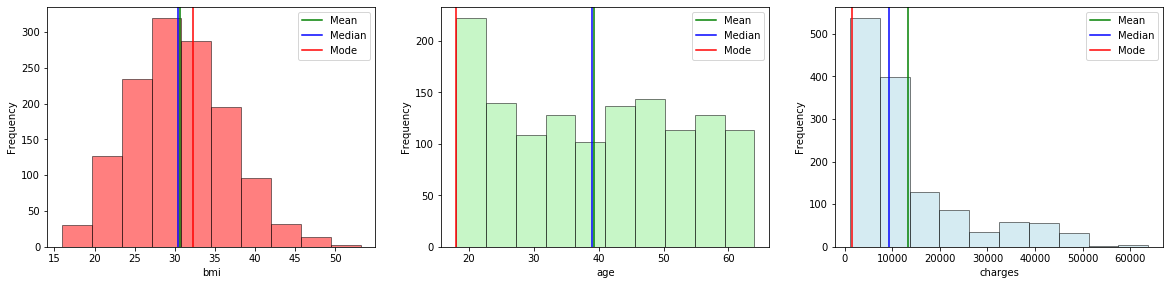

In [93]:
plt.figure(figsize= (20,15))


plt.subplot(3,3,1)
plt.hist(insurance_df.bmi,color='red', edgecolor = 'black', alpha = 0.5)
plt.ylabel('Frequency') # label the y-axis
plt.xlabel('bmi')
plt.axvline(insurance_df.bmi.mean(),color='green',label='Mean')  
plt.axvline(insurance_df.bmi.median(),color='blue',label='Median')
plt.axvline(insurance_df.bmi.mode()[0],color='red',label='Mode')
plt.legend()  

plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='lightgreen', edgecolor = 'black', alpha = 0.5)
plt.ylabel('Frequency') # label the y-axis
plt.xlabel('age')
plt.axvline(insurance_df.age.mean(),color='green',label='Mean')  
plt.axvline(insurance_df.age.median(),color='blue',label='Median')
plt.axvline(insurance_df.age.mode()[0],color='red',label='Mode')
plt.legend()  

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='lightblue', edgecolor = 'black', alpha = 0.5)
plt.ylabel('Frequency') # label the y-axis
plt.xlabel('charges')
plt.axvline(insurance_df.charges.mean(),color='green',label='Mean')  
plt.axvline(insurance_df.charges.median(),color='blue',label='Median')
plt.axvline(insurance_df.charges.mode()[0],color='red',label='Mode')
plt.legend()     # Plot the legend
         

plt.show()


* bmi is almost normally distributed
* Age is uniformly normally
* Charges are highly skewed


> f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges columns

In [94]:
skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.charges)]},
                        index=['bmi','age','charges'])  
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180
